**TD  Analyse de texte**

Le but de cette séance de TD, c’est d'analyser de façon simple le texte proposé à l’aide du langage Python.

Étapes du TD
1.   Charger les bibliothèques
2.   Charger les données
3.   Nettoyage de données
4. Q1: nombre de commentaires par mois et anne
5. Q2: identifier la langue
6. Q3 Tracez un nuage de mots pour observer les mots qui reviennent le plus souvent.
7. Q4 Identifier les mots les plus fréquents.
10.Q6 Analyser les dépendances d'un texte
11. Named Entity Recognition NER
12. Q7 NER



**1 Charger les bibliothèques**



In [41]:
!pip install langdetect

#Gestion des données et DataViz
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as pyo
import plotly.graph_objs as go

#Détection de la langue
from langdetect import detect
from wordcloud import WordCloud,STOPWORDS
import gensim, spacy, logging, warnings
from spacy import displacy
from spacy.util import minibatch, compounding

#Analyse de texte
from nltk.corpus import stopwords
import os.path
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words('french')
from sklearn.feature_extraction.text import CountVectorizer



!pip install -U pip setuptools wheel
!pip install spacy
!python -m spacy download fr_core_news_md

import spacy
import fr_core_news_md
nlp = fr_core_news_md.load()
doc = nlp("Je suis Roque")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 MB 101.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


**2 Charger les données**

Source https://fr.trustpilot.com/review/www.orange.fr


In [42]:
url = "https://raw.githubusercontent.com/roquelealfr/td-text-analytics/main/OrangeFR.csv"
df = pd.read_csv(url)
df.head()

,Date,Titres,Contents
0,2021-03-31,arnaque,Mon père qui vient de décéder possédait une of...
1,2021-03-31,c'est trop long à expliqué tellement…,c'est trop long à expliqué tellement aucunes d...
2,2021-03-31,Le service client d'Orange est déplorable !,Le service client téléphonique d'Orange est dé...
3,2021-03-30,J'attend toujours ma carte sim depuis plus de ...,J'ai dut changer de mobil suite à un vol j'ai...
4,2021-03-30,Orange c'est quoi la fibre ?,Orange c'est quoi la fibre ?Voila plusieurs mo...


In [43]:
df.shape

(3493, 3)

Tirez un échantillon de 100 lignes de données au hasard.

In [44]:
df=df.sample(100,random_state=18)
df.shape

(100, 3)

**3. Nettoyage de données**

In [45]:
df=df.rename(columns={"date_published": "date"})

In [46]:
#Joignez le titre et le contenu
df['text'] = df['Titres'] + ' ' + df['Contents']

In [47]:
df.head(100)

,Date,Titres,Contents,text
642,2020-10-28,Lamentable,Lamentable! Je dois être raccordé à la fibre d...,Lamentable Lamentable! Je dois être raccordé ...
2261,2019-02-01,Chez Orange depuis 18ans aujourd'hui je regrette,Chez Orange depuis 18ans j'ai migré chez free...,Chez Orange depuis 18ans aujourd'hui je regret...
2664,2018-02-01,Minable. La patience est de rigueur.,J ai changé le nom du titulaire du contrat. ...,Minable. La patience est de rigueur. J ai cha...
2110,2019-05-31,Un service incompétent des conseillers…,Un service incompétent des conseillers incompé...,Un service incompétent des conseillers… Un se...
3044,2014-12-20,Orange j'adhère à 200% !,J'étais chez B&You auparavant et j'ai changé p...,Orange j'adhère à 200% ! J'étais chez B&You ...
...,...,...,...,...
1746,2019-12-16,Calvaire !!!,J'avais fait un déménagement de ma ligne orang...,Calvaire !!! J'avais fait un déménagement de ...
3099,2012-10-29,messagerie orange ras le bol,cette messagerie change sans cesse d'aspect d...,messagerie orange ras le bol cette messagerie...
540,2020-11-19,Service honteux pratiques honteuses,Une grande marque qui se sent en totale impuni...,Service honteux pratiques honteuses Une gran...
1552,2020-02-17,Service clients qui n'en est pas un !!,Très vite démarchée par Orange pour signer un ...,Service clients qui n'en est pas un !! Très v...


**5 Q2**: identifier la langue

In [48]:
def detect_lang(texte):
    return detect(texte)

In [49]:
df["lang"] = df['Contents'].apply(detect_lang)
df.head(10)

,Date,Titres,Contents,text,lang
642,2020-10-28,Lamentable,Lamentable! Je dois être raccordé à la fibre d...,Lamentable Lamentable! Je dois être raccordé ...,fr
2261,2019-02-01,Chez Orange depuis 18ans aujourd'hui je regrette,Chez Orange depuis 18ans j'ai migré chez free...,Chez Orange depuis 18ans aujourd'hui je regret...,fr
2664,2018-02-01,Minable. La patience est de rigueur.,J ai changé le nom du titulaire du contrat. ...,Minable. La patience est de rigueur. J ai cha...,fr
2110,2019-05-31,Un service incompétent des conseillers…,Un service incompétent des conseillers incompé...,Un service incompétent des conseillers… Un se...,fr
3044,2014-12-20,Orange j'adhère à 200% !,J'étais chez B&You auparavant et j'ai changé p...,Orange j'adhère à 200% ! J'étais chez B&You ...,fr
3101,2012-10-03,orange comme orange,depuis des années je suis chez eux pour fix m...,orange comme orange depuis des années je suis...,fr
3358,2012-02-02,Catastrophique ...,Arnaques en tous genres incompétences mauvai...,Catastrophique ... Arnaques en tous genres i...,fr
3,2021-03-30,J'attend toujours ma carte sim depuis plus de ...,J'ai dut changer de mobil suite à un vol j'ai...,J'attend toujours ma carte sim depuis plus de ...,fr
3249,2012-04-12,0 sur toute la ligne,Furieux depuis des années des prix et des char...,0 sur toute la ligne Furieux depuis des année...,fr
2605,2018-04-01,Une catastrophe,Une catastrophe. Je viens d'acheter une box PL...,Une catastrophe Une catastrophe. Je viens d'a...,fr


Nettoyage des données

**NLP: Tokenization , Lemmatization**

**Stop word**
Le terme stop word ou mot vide désigne tous les mots n'ayant pas de réelle signification. On dit aussi qu'ils ne sont pas porteurs de sens. En effet, ils sont si courants et reviennent de façon tellement régulière qu’ils ne permettent pas de caractériser, au sens lexical, un texte par rapport à un autre texte.

Les stopwords français sont généralement des mots dits grammaticaux tels que des adverbes, des pronoms ou encore des mots de liaison.

In [50]:
stop_words = list(stopwords.words('french'))+['ctre','orange','avoir','être','tre','très']
stop_words

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


**Lemmatisation**
lemmatisation consiste à identifier la fonction grammaticale d'un mot fléchi pour pouvoir en déduire son lemme.

In [51]:
def lemma_word(word):
    doc=nlp(word)
    for t in doc:
        token=t.lemma_
    return token
lemma_word('animaux')

'animal'

**Tokenisation**
La tokenisation est le processus qui consiste à décomposer des données complexes comme les paragraphes en unités simples appelées tokens.

In [52]:
def preprocess(row):
    content = row['text']
    tokens = nltk.word_tokenize(content)
    tokens= [w for w in tokens if w.isalpha()]
    tokens= [lemma_word(word) for word in tokens]
    tokens= [word for word in tokens if not word in stop_words]
    print(tokens)
    return tokens

df['words'] = df.apply(preprocess, axis=1)
df[['text', 'words']].head(10)

['lamentable', 'lamentable', 'dois', 'raccorder', 'fibre', 'depuis', 'jour', 'toujours', 'rien', 'service', 'client', 'servir', 'sctrictement', 'rien', 'part', 'répéter', 'fois', 'chose', 'fuir']
['chez', 'depuis', 'regrette', 'chez', 'depuis', 'migrer', 'chez', 'free', 'depuis', 'jour', 'vouloir', 'connecter', 'messagerie', 'basculer', 'tout', 'donnée', 'mail', 'vers', 'nouveau', 'boîte', 'donner', 'mois', 'là', 'impossible', 'connecter', 'mot', 'passer', 'fonctionne', 'lorsque', 'fai', 'mot', 'passer', 'oublier', 'envoyer', 'adresse', 'récupération', 'connai', 'pirate', 'version', 'différent', 'différent', 'attente', 'min', 'chaque', 'dire', 'voir', 'compte', 'résilier', 'pouvoir', 'renvoyer', 'mot', 'passer', 'pète', 'câble', 'dis', 'hier', 'client', 'coordonnée', 'souci', 'fai', 'pirater', 'donner', 'raison', 'pirate', 'laissez', 'faire', 'mayonnaise', 'sans', 'puisse', 'reprendre', 'contrôle', 'sous', 'prétexte', 'vouloir', 'envoyez', 'mot', 'passer', 'impossible', 'connecter', 'r

,text,words
642,Lamentable Lamentable! Je dois être raccordé ...,"[lamentable, lamentable, dois, raccorder, fibr..."
2261,Chez Orange depuis 18ans aujourd'hui je regret...,"[chez, depuis, regrette, chez, depuis, migrer,..."
2664,Minable. La patience est de rigueur. J ai cha...,"[Minable, patience, rigueur, changer, nom, tit..."
2110,Un service incompétent des conseillers… Un se...,"[service, incompétent, service, incompétent, c..."
3044,Orange j'adhère à 200% ! J'étais chez B&You ...,"[chez, b, You, auparavant, changer, Sosh, fili..."
3101,orange comme orange depuis des années je suis...,"[comme, depuis, année, chez, fix, mobil, inter..."
3358,Catastrophique ... Arnaques en tous genres i...,"[catastrophique, arnaque, tout, genre, incompé..."
3,J'attend toujours ma carte sim depuis plus de ...,"[toujours, carte, sim, depuis, plus, trois, se..."
3249,0 sur toute la ligne Furieux depuis des année...,"[tout, ligne, furieux, depuis, année, prix, ch..."
2605,Une catastrophe Une catastrophe. Je viens d'a...,"[catastrophe, catastrophe, vien, box, play, ch..."


In [53]:
df['words_string'] = [','.join(map(str, l)) for l in df['words']]
df.head()

,Date,Titres,Contents,text,lang,words,words_string
642,2020-10-28,Lamentable,Lamentable! Je dois être raccordé à la fibre d...,Lamentable Lamentable! Je dois être raccordé ...,fr,"[lamentable, lamentable, dois, raccorder, fibr...","lamentable,lamentable,dois,raccorder,fibre,dep..."
2261,2019-02-01,Chez Orange depuis 18ans aujourd'hui je regrette,Chez Orange depuis 18ans j'ai migré chez free...,Chez Orange depuis 18ans aujourd'hui je regret...,fr,"[chez, depuis, regrette, chez, depuis, migrer,...","chez,depuis,regrette,chez,depuis,migrer,chez,f..."
2664,2018-02-01,Minable. La patience est de rigueur.,J ai changé le nom du titulaire du contrat. ...,Minable. La patience est de rigueur. J ai cha...,fr,"[Minable, patience, rigueur, changer, nom, tit...","Minable,patience,rigueur,changer,nom,titulaire..."
2110,2019-05-31,Un service incompétent des conseillers…,Un service incompétent des conseillers incompé...,Un service incompétent des conseillers… Un se...,fr,"[service, incompétent, service, incompétent, c...","service,incompétent,service,incompétent,consei..."
3044,2014-12-20,Orange j'adhère à 200% !,J'étais chez B&You auparavant et j'ai changé p...,Orange j'adhère à 200% ! J'étais chez B&You ...,fr,"[chez, b, You, auparavant, changer, Sosh, fili...","chez,b,You,auparavant,changer,Sosh,filiale,low..."


**6 Q3** Tracez un nuage de mots pour observer les mots qui reviennent le plus souvent.

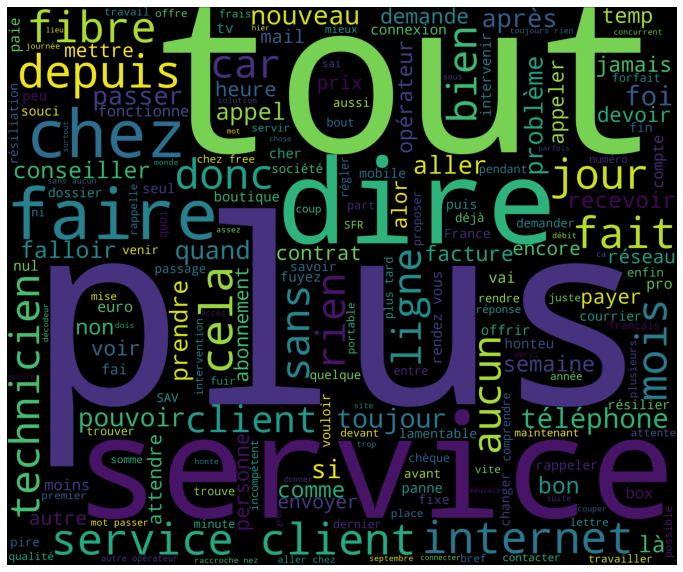

In [54]:
words = " ".join(df['words_string'])
                 
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
                 
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**7 Q4** Identifier les mots les plus fréquents.

In [55]:
#Instanciez l'objet vectoriel
cv = CountVectorizer()

#Convertir les critiques en une matrice - où chaque ligne représente un texte spécifique dans les critiques et chaque colonne représente 
#un mot du vocabulaire. words[i,j] est l'occurrence du mot j dans le texte i.
words = cv.fit_transform(df["words_string"])

#sum_words est un vecteur qui contient la somme de chaque occurrence de mot dans tous les textes des critiques. 
#Nous ajoutons les éléments pour chaque colonne de la matrice des mots.
sum_words = words.sum(axis=0)

#Créer une liste de tuples avec le mot et la fréquence. cv.vocabulary_ est un dict, où les clés sont les mots (caractéristiques) et les valeurs sont des indices. 
#les mots (caractéristiques) et les valeurs sont des indices
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

#Trier la liste des tuples qui contiennent le mot et leur occurrence dans le corpus.
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

#Créer un dataframe
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

#Plot
word_freq_bar = go.Bar(x = frequency["word"].head(10), y = frequency["freq"].head(10))
layout = go.Layout(title = "LES 20 MOTS LES PLUS FRÉQUENTS", yaxis_title = "Count")
fig = go.Figure(word_freq_bar,layout)
iplot(fig)

**9 Le NLP avec SpaCy !**

In [56]:
sample_review=df.iloc[5]['Contents']
sample_review

'depuis des années je suis chez eux pour fix  mobil  internet jamais le moindre probleme agreable au telephonne service rapide que du bonheur'

In [57]:
parsed_review = nlp(sample_review)
parsed_review

depuis des années je suis chez eux pour fix  mobil  internet jamais le moindre probleme agreable au telephonne service rapide que du bonheur

In [58]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py

--2022-03-10 18:22:07--  https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6896 (6.7K) [text/plain]
Saving to: ‘explacy.py.2’

explacy.py.2        100%[===================>]   6.73K  --.-KB/s    in 0s      

2022-03-10 18:22:07 (42.5 MB/s) - ‘explacy.py.2’ saved [6896/6896]



**10.** **Q6** Analyser les dépendances d'un texte

**Analyse des dépendances**
Chaque phrase a une structure grammaticale et, à l'aide de l'analyse syntaxique des dépendances, nous pouvons extraire cette structure. Grâce à elle nous allons pouvoir recomposer une phrase en reliant les mots dans leur contexte. Dans l’exemple ci-dessous nous reprenons notre phrase et indiquons chaque dépendance avec les propriétés.

In [59]:
import explacy
explacy.print_parse_info(nlp, 'Je suis Roque')

Dep tree Token Dep type Lemma Part of Sp
──────── ───── ──────── ───── ──────────
┌──►     Je    nsubj    je    PRON      
│┌─►     suis  cop      être  AUX       
└┴──     Roque ROOT     roque NOUN      


In [60]:
explacy.print_parse_info(nlp,df.iloc[5]['Contents'])

Dep tree       Token      Dep type  Lemma      Part of Sp
────────────── ────────── ───────── ────────── ──────────
          ┌──► depuis     case      depuis     ADP       
          │┌─► des        det       un         DET       
       ┌─►└┴── années     obl       année      NOUN      
       │ ┌───► je         nsubj     je         PRON      
       │ │┌──► suis       cop       être       AUX       
       │ ││┌─► chez       case      chez       ADP       
┌──────┴─┴┴┴── eux        ROOT      lui        PRON      
│          ┌─► pour       case      pour       ADP       
└─►┌┬──┬┬──┼── fix        nmod      fix        PROPN     
   ││  ││  └─►                                 SPACE     
   ││  │└─►┌── mobil      flat:name mobil      X         
   ││  │   └─►                                 SPACE     
   ││  └─────► internet   flat:name internet   NOUN      
   ││    ┌───► jamais     advmod    jamais     ADV       
   ││    │┌──► le         det       le         DET       
   ││    ││┌─►

In [61]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(parsed_review):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,depuis,depuis,ADP,ADP___,case,xxxx,True,True,False
1,des,"(un,)",DET,DET__Definite=Ind|Number=Plur|PronType=Art,det,xxx,True,True,False
2,années,"(année,)",NOUN,NOUN__Gender=Fem|Number=Plur,obl,xxxx,True,False,False
3,je,"(je,)",PRON,PRON__Number=Sing|Person=1,nsubj,xx,True,True,False
4,suis,"(être,)",AUX,AUX__Mood=Ind|Number=Sing|Person=1|Tense=Pres|...,cop,xxxx,True,True,False
5,chez,"(chez,)",ADP,ADP___,case,xxxx,True,True,False
6,eux,"(lui,)",PRON,PRON__Gender=Masc|Number=Plur|Person=3|PronTyp...,ROOT,xxx,True,True,False
7,pour,"(pour,)",ADP,ADP___,case,xxxx,True,True,False
8,fix,"(fix,)",PROPN,PROPN___,nmod,xxx,True,False,False
9,,"( ,)",SPACE,_SP,,,False,False,False


Heureusement SpaCy a une fonction de trace pour rendre ce résultat visuel. Pour l’utiliser vous devez importer displacy:

In [62]:
sentence_spans = list(parsed_review.sents)
sentence_spans

[depuis des années je suis chez eux pour fix  mobil  internet jamais le moindre probleme agreable au telephonne service rapide que du bonheur]

In [63]:
displacy.render(parsed_review, style='dep', jupyter=True,options={'distance': 140})

In [64]:
options = {'compact': True, 'bg': 'blue','distance': 140,
           'color': 'white', 'font': 'Trebuchet MS'}
displacy.render(parsed_review, jupyter=True, style='dep', options=options)

In [65]:
spacy.explain("ADJ") ,spacy.explain("det") ,spacy.explain("ADP") ,spacy.explain("prep")  # to understand tags

('adjective', 'determiner', 'adposition', 'prepositional modifier')

**11 Named Entity Recognition NER**
SpaCy dispose d’un système de reconnaissance d’entités statistiques (NER ou Named Entity Recognition) très performant et qui va assigner des étiquettes à des plages contiguës de tokens.

In [66]:
doc = nlp("Je m'appelle Roque Leal, je viens du Venezuela, je vis à Lyon et je travaille chez Google.")

for ent in doc.ents:
    print(ent.text, ent.label_)

Roque Leal PER
Venezuela LOC
Lyon LOC
Google ORG


Le code précédent parcours les mots dans leur contexte et va reconnaître que Roque est un prenom, Venezuela est un élément de localisation et que Google est une organisation (commerciale) :

**12** Q7 NER

In [67]:
spacy.displacy.render(doc, style='ent', jupyter=True)